<a href="https://colab.research.google.com/github/tuntunwinkic/piml/blob/master/Mobile_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from fastai.vision import*

In [ ]:
import os

In [ ]:
os.chdir('/content/gdrive/My Drive/LLW/BN')

In [ ]:
path = Path('/content/gdrive/My Drive/LLW/BN')

In [ ]:
path.ls()

[PosixPath('/content/gdrive/My Drive/LLW/BN/500'),
 PosixPath('/content/gdrive/My Drive/LLW/BN/100'),
 PosixPath('/content/gdrive/My Drive/LLW/BN/5000'),
 PosixPath('/content/gdrive/My Drive/LLW/BN/10000'),
 PosixPath('/content/gdrive/My Drive/LLW/BN/1000'),
 PosixPath('/content/gdrive/My Drive/LLW/BN/200')]

In [ ]:
classes = ['5000','500','1000','10000','100']

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)


5000


500


1000


10000


100


In [ ]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.3,
         size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['100', '1000', '10000', '500', '5000'], 5, 65, 27)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)


In [ ]:
learn.fit_one_cycle(7)

epoch,train_loss,valid_loss,error_rate,time
0,2.170279,3.204879,0.740741,00:02
1,1.852772,1.543769,0.666667,00:02
2,1.223818,0.646617,0.259259,00:02
3,0.908562,0.264455,0.037037,00:02
4,0.719444,0.122119,0.037037,00:02
5,0.593421,0.052440,0.037037,00:02
6,0.503433,0.023071,0.000000,00:02


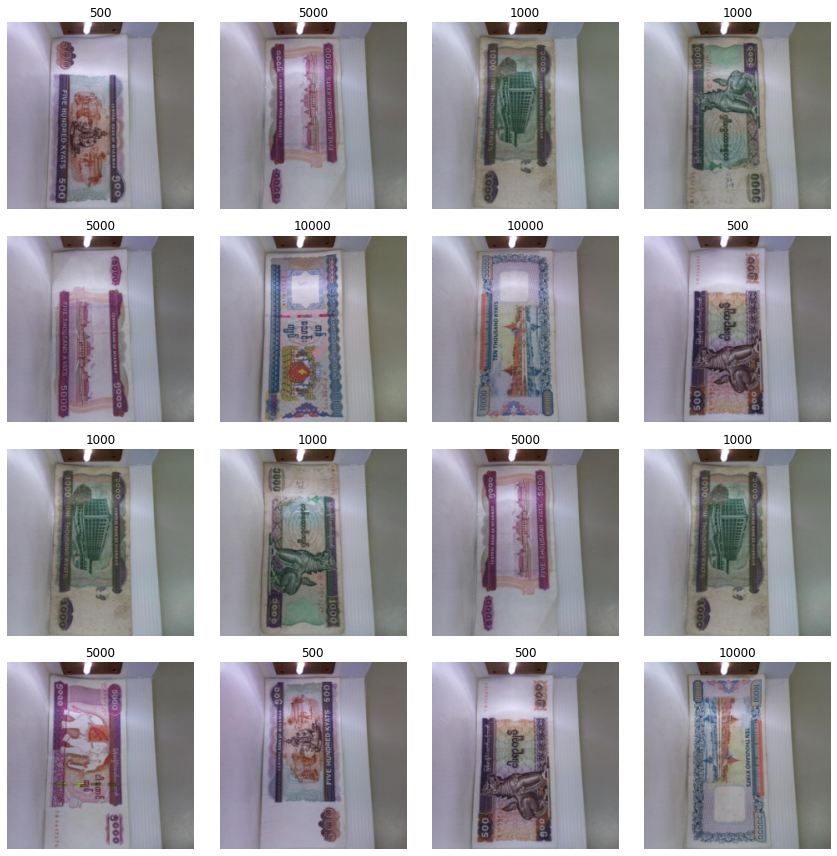

In [ ]:
data.show_batch(rows=4, figsize=(12,12))


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


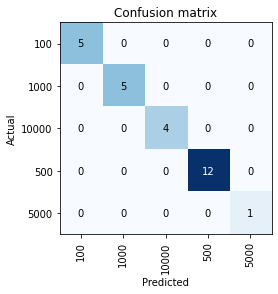

In [ ]:
interp.plot_confusion_matrix()


In [ ]:
img = open_image('/content/gdrive/My Drive/LLW/Banknotes/1000new/20200309_192552.jpg')


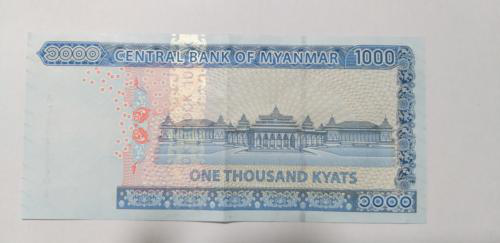

In [ ]:
img

In [ ]:

pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tensor(0)

In [ ]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
___________________________________________________

In [ ]:
import torch

In [ ]:
import torchvision.models as TorchModels


In [ ]:
!pip install googlenet-pytorch

In [ ]:
learn = cnn_learner(data, models.mobilenet_v2, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/checkpoints/mobilenet_v2-b0353104.pth


In [ ]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [32, 112, 112]       864        False     
______________________________________________________________________
BatchNorm2d          [32, 112, 112]       64         True      
______________________________________________________________________
ReLU6                [32, 112, 112]       0          False     
______________________________________________________________________
Conv2d               [32, 112, 112]       288        False     
______________________________________________________________________
BatchNorm2d          [32, 112, 112]       64         True      
______________________________________________________________________
ReLU6                [32, 112, 112]       0          False     
______________________________________________________________________
Conv2d               [16, 112, 112]       512        False     
___________________________________________________

In [ ]:
learn.fit_one_cycle(7)

epoch,train_loss,valid_loss,error_rate,time
0,1.997634,3.501732,0.962963,00:03
1,1.690314,1.688662,0.777778,00:01
2,1.119240,0.863391,0.222222,00:01
3,0.831032,0.495620,0.148148,00:01
4,0.658187,0.287664,0.111111,00:01
5,0.542911,0.156636,0.111111,00:01
6,0.460614,0.080096,0.000000,00:01


In [ ]:
learn.export()

In [ ]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [32, 112, 112]       864        False     
______________________________________________________________________
BatchNorm2d          [32, 112, 112]       64         True      
______________________________________________________________________
ReLU6                [32, 112, 112]       0          False     
______________________________________________________________________
Conv2d               [32, 112, 112]       288        False     
______________________________________________________________________
BatchNorm2d          [32, 112, 112]       64         True      
______________________________________________________________________
ReLU6                [32, 112, 112]       0          False     
______________________________________________________________________
Conv2d               [16, 112, 112]       512        False     
___________________________________________________

In [ ]:
le = load_learner(path)

In [ ]:

pred_class,pred_idx,outputs = le.predict(img)
pred_class

Category tensor(0)